# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Ferdy Dharmawan Dwi Budiono
- Email: ferdydharmawan2005@gmail.com
- Id Dicoding: ferdyddb

## Menentukan Pertanyaan Bisnis

- Berapa Total Penyewa dalam Beberapa Bulan/Tahun Terakir?
- Berapakah Total Penyewa berdasarkan Cuaca yang terjadi?
- Berapakah total rata-rata Jam dalam satu hari?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv") #--> memasukkan file csv
hour_df = pd.read_csv("hour.csv")

In [ ]:
### Assessing Data

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [9]:
datetime_columns = ["dteday"]
     
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])#--> mengubah tipedata dteday dari object ke datetime
    hour_df[column] = pd.to_datetime(hour_df[column])


In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

In [21]:
cuaca_df = day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False).reset_index()#--> menampilkan Jumlah penyewaan sepeda berdasarkan kondisi cuaca dengan barplot
cuaca_df.head()

,weathersit,cnt
0,1,451
1,2,243
2,3,21


In [13]:
day_hour_df = pd.merge( 
    day_df,
    hour_df,
    on='dteday'
)#---> menggabungkan day_df & hour_df 

rata_jam_df = day_hour_df.groupby('dteday')['hr'].mean().reset_index()#---> membuat dataframe baru guna mengetahui rata-rata jam perhari


In [14]:
rata_jam_df.head()

dteday
2011-01-01    11.500000
2011-01-02    11.782609
2011-01-03    12.318182
2011-01-04    11.869565
2011-01-05    11.869565
Name: hr, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa Total Penyewa dalam Beberapa Bulan/Tahun Terakir? 

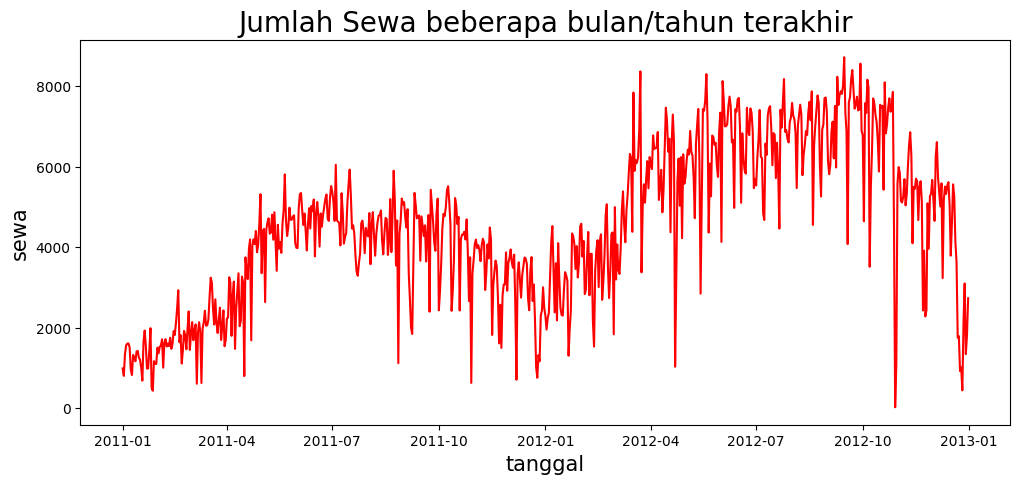

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(day_df["dteday"], day_df["cnt"], color='red')
plt.title("Jumlah Sewa beberapa bulan/tahun terakhir", loc="center", fontsize=20)
plt.xlabel('tanggal',size=15)
plt.ylabel('sewa',size=15)
plt.show()#--> menampilkan Jumlah Penyewaan sepeda beberapa bulan/tahun terakhir dengan plot

### Pertanyaan 2: Berapakah Total Penyewa berdasarkan Cuaca yang terjadi?

<Axes: xlabel='weathersit', ylabel='cnt'>

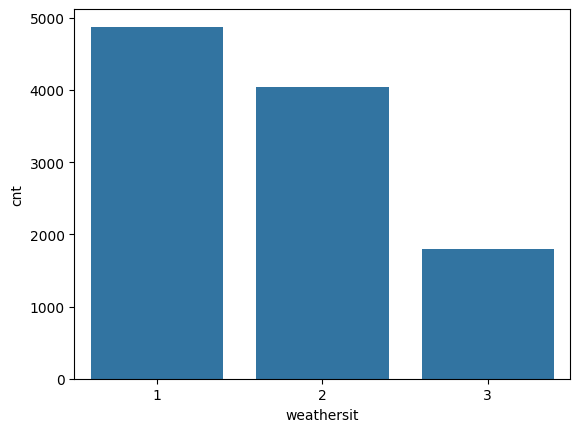

In [16]:
sns.barplot(day_df, x="weathersit", y="cnt", errorbar=None)#---> menampilkan barplot untuk menampilkan penyewaan berdasarkan cuaca

### Pertanyaan 3: Berapakah total rata-rata Jam dalam satu hari?

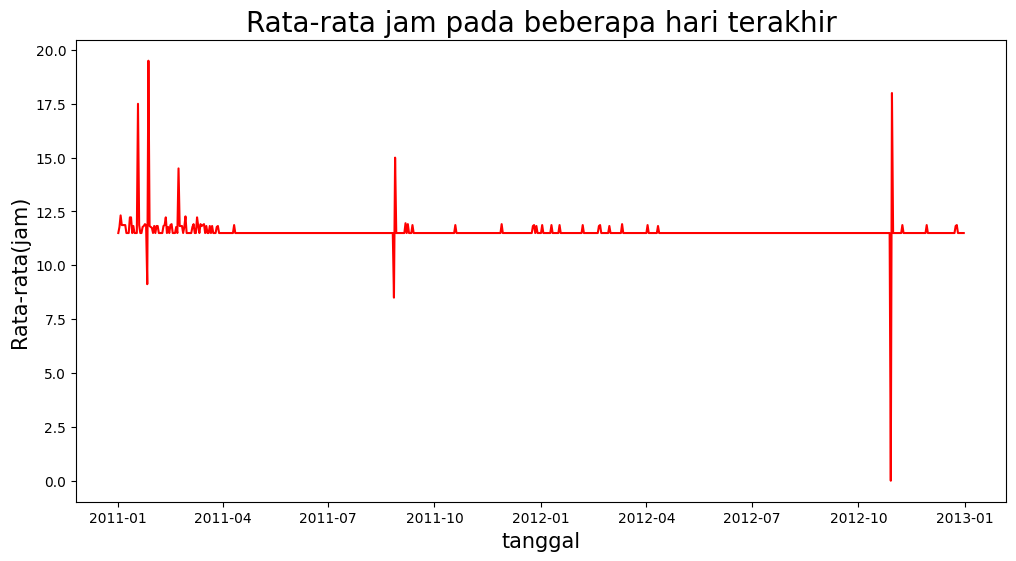

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(rata_jam_df.index, rata_jam_df.values, color='red')
plt.title("Rata-rata jam pada beberapa hari terakhir", loc="center", fontsize=20)
plt.xlabel('tanggal',size=15)
plt.ylabel('Rata-rata(jam)',size=15)
plt.show()#--> membuat plot untuk rata-rata jam dalam perhari

### CONCLUSION

### Pertanyaan 1: Berapa Total Penyewa dalam Beberapa Bulan/Tahun Terakir? 

In [18]:
print("Jumlah total penyewa dalam beberapa bulan/tahun: ", day_df.cnt.sum())

Jumlah total penyewa dalam beberapa bulan/tahun:  3292679


### Pertanyaan 2: Berapakah Total Penyewa berdasarkan Cuaca yang terjadi?

In [26]:
print("jumlah total penyewa berdasarkan cuaca: ", cuaca_df.iloc[0])

jumlah total penyewa berdasarkan cuaca:  weathersit      1
cnt           451
Name: 0, dtype: int64


In [27]:
print("jumlah total penyewa berdasarkan cuaca: ", cuaca_df.iloc[1])

jumlah total penyewa berdasarkan cuaca:  weathersit      2
cnt           243
Name: 1, dtype: int64


In [28]:
print("jumlah total penyewa berdasarkan cuaca: ", cuaca_df.iloc[2])

jumlah total penyewa berdasarkan cuaca:  weathersit     3
cnt           21
Name: 2, dtype: int64


### Pertanyaan 3: Berapakah total rata-rata Jam dalam satu hari?

In [36]:
print("jumlah total rata-rata jam perhari: ", rata_jam_df.values.sum())

jumlah total rata-rata jam perhari:  8442.690217391304
